In [ ]:
from reviews_test import Reviews
from general_report import Report
from word_report_test import Word_Report
from matplotlib import pyplot as plt
import PIL
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from pylatex import Document, Section, Subsection, Command, Figure, \
Tabular, Math, TikZ, Axis, Plot, Figure, Package, Matrix, Tabu, Center, Tabularx, NewPage, LineBreak, \
FlushLeft, FlushRight, TextBlock, NewLine, HFill
from pylatex.utils import italic, NoEscape, bold
import pdflatex
import os
import pandas as pd
import glob
import regex as re
from grapher import Histogram
#Need: 2020 Pilot
    #  2020 Original
    #  2019
    #  2020

In [ ]:
def latex_report(name, words, lsts, term_lengths):
    results_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/'
    data_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/*.csv'
    gen_path = '/Users/bbhoar/Documents/student_reviews/'
    words_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/word_reports/'
    
    doc = Document('report')
    doc.packages.append(Package('geometry', options=['tmargin=1cm',
                                                     'lmargin=2cm',
                                                     'rmargin=2cm',
                                                     'bmargin=2cm']))

    introduction = "The following is the sentiment analysis report of your student reviews from:"
    
    introduction_cont = "Scores were calculated using a predictive model trained via the Google Natural Language Sentiment Analysis API. \
                    The model was trained on real student course reviews sourced from UCLA faculty and RateMyProfessor.com. \
                    The data used for training was scored \
                    on a scale of 0 to 4 (negative to positive) by twenty-one UCLA students, the median score \
                    of the students was subsequently taken as the \"real\" \
                    score for each review. In this report, your raw review data has been processed, scored, and organized into summative and \
                    categorical sections. This review processing is similar to the example shown below:"

    intro_example = "The professor was very knowledgable. I thought she/he was very capable, but often they did not provide enough direction. Overall, \
                     though, I enjoyed the class!"

    intro_parsed = "The professor was very knowledgable.\nI thought she/he was very capable\nOften they did not provide enough direction.\nOverall \
                    though, I enjoyed the class!"

    intro_two = "These parsed reviews, along with their scores, can be filtered and used to generate this report – aiming to \
                 enhance the existing review process by highlighting student sentiment towards various course aspects."

    score_desc = "Scores presented herein are predicted by the Google Natural Language API Trained\
                  model. The model has a 73% accuracy, however errored predictions typically fall within one point \
                  of the correct score (~92% of instances are either correct or within 1 point).\n\n"

    score_scale = "0: More Negative – 1: Negative – 2: Neutral – 3: Positive – 4: More Positive"
    #score_scale = "0: Negative – 1: Neutral – 2: Positive"

    author = name[1] + " " + name[0]
    doc.preamble.append(Command('title', 'Student Evaluations Sentiment Analysis'))
    doc.preamble.append(Command('author', "Reviews for: " + author))
    doc.preamble.append(Command('date', NoEscape(r'\today')))
    doc.append(NoEscape(r'\maketitle'))

    with doc.create(Section('Overview')):
        with doc.create(FlushLeft()) as left:
            left.append(introduction)
        i = 0
        with doc.create(Center()) as center:
            for file in glob.glob(data_path):
                l = re.findall(r'\d+', file)
                t = file[file.find(l[0]):]
                center.append(t + "\t")
                i += 1
                if (i % 2 == 0): doc.append(LineBreak())
        doc.append(introduction_cont)
        with doc.create(FlushLeft()) as left:
            left.append(bold("Original Review:"))
            left.append(LineBreak())
            left.append(italic(intro_example))
            left.append(LineBreak())
            left.append(bold("Parsed Reviews:"))
            left.append(LineBreak())
            left.append(italic(intro_parsed))
        doc.append(intro_two)
        doc.append(LineBreak())
        doc.append(score_desc)
        with doc.create(Center()) as center:
            center.append(score_scale)
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(gen_path + 'SA.png', width='250px')

        #doc.append(italic('your students hated you.'))

    doc.append(NewPage())
    with doc.create(Section('Scoring System')):
        doc.append("The following is a more detailed discussion of the scoring scheme. Please, not that the comments presented \
                    on this page are NOT from your course evaluations and are intended only to help introduce the \
                    the scoring system. As mentioned on page 1, the \
                    scale was initially determined by human scorers in order to \
                    train the algorithm that subsequently provides the scores presented in this and other reports. \
                    Please, note that the algorithm makes mistakes, but provides general guidance and insight \
                    into student opinion on course aspects – globally and specifically – providing strong aggregate \
                    results based on algorithm training results. Errors tend to be more pronounceed \
                    for the most negative reviews (false 0 predictions) when the true \
                    sentiment is biased highly positive. For example, over the course of a full body of reviews, \
                    some scores of 0 are bound to be given to statements as a function of misclassification. Due to the \
                    algorithms behind this report, those misclassifications are especially likely to be shown if the comments are \
                    overall heavily biased towards the positive end. We wanted to show examples of each, but if no students said anything \
                    negative, then the comments scored in error will appear as the representatives of those scores.\
                    A brief explanation and visual of the scoring \
                    system is given below. Phrases presented in the visual were scored by the algorithm: ")
        doc.append(HFill())
        doc.append(NewLine())
        with doc.create(FlushLeft()) as left:
            left.append(bold("Score 4: "))
            left.append("These scores are considered to be exceptionally laudatory or positive.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 3: "))
            left.append("These scores are considered to be generally positive or favorable.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 2: "))
            left.append("These scores are considered to be neutral, or highly ")
            left.append(italic("subjective or ambiguous  "))
            left.append("in terms of favorability. For example, a comment claiming a course was \
                        \"very fast-paced\" may be considered a criticism to some, or neutral to positive to others.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 1: "))
            left.append("These scores are considered to be generally negative or critical.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 0: "))
            left.append("These scores are considered to be more unfavorable or negative.")
        for i in range(3):
            doc.append(HFill())
            doc.append(NewLine())
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(gen_path + 'scale_page.png', width='450px')

    doc.append(NewPage())
    with doc.create(Section('General Results')):
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + '_histo.png', width='400px')
            pic.add_caption('Scores of phrases averaged by their student authors. For example, one student may have made \
                             five comments with an average score of 3. That average is represented here.')
            pic.add_image(results_path + 'raw_histo.png', width='400px')
            pic.add_caption('Raw scores of all phrases from all students. These are the scores for all parsed comments from students \
                             regardless of author. For example, if all students made 25 comments that were scored as 4, then the x-axis \
                             value of 4 would show a count of 25.')

        doc.append(NewPage())
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'word_averages.png', width='400px')
            pic.add_caption('Average scores of phrases referencing common topics. The first 6 terms on the x-axis were manually chosen \
                             for their relevance to all courses, and the rest were chosen by an algorithm discussed on the next page.')
            pic.add_image(results_path + 'distribution.png', width='400px')
            pic.add_caption('Overall course evaluation score distributions based on sentiment analysis (blue, see Figure 1) versus values provided \
                             by students in their course evaluations (red). Note – both scales were adjusted to a 0-1 scale for comparison purposes.')

    doc.append(NewPage())
    with doc.create(Section('Word Specific Summaries')):
        doc.append("The following pages, until the end of the report, are word specific reports. These terms were \
                    selected in two ways as shown in the subsections below.")
    with doc.create(Subsection('Pre-Selected Terms')):
        doc.append("The terms shown here represent aspects of the course that are considered of general interest; these \
                    terms were pre-selected by committee. Words that are grouped together are considered synonymous.")
        with doc.create(FlushLeft()) as left:
            for lst in lsts:
                s = str(lst)
                left.append(lst)
                left.append(LineBreak())

    with doc.create(Subsection('Auto-Selected Terms')):
        doc.append("The figure shown here is a word-cloud of common terms (besides the ones already listed above) and \
                    was used as a foundation for selecting terms not encompassed by the above lists. The top 6 terms are \
                    presented in \"word-reports\" below.")
        doc.append(LineBreak())
        doc.append(HFill())
        doc.append(NewLine())
        doc.append("The auto-selected terms are: ")
        doc.append(words)

        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'word_cloud.png', width='500px')

    doc.append(NewPage())
    #for file in sorted(glob.glob(words_path)):
    for word in term_lengths:
        section_title = 'Subreport for terms associated with: ' + word[1]
        with doc.create(Section(section_title)):
            with doc.create(Figure(position='h!')) as pic:
                pic.add_image(words_path + word[1] + '.png', width='250px')
                #pic.add_caption('You little shit.')
        with doc.create(Subsection('Table')):
            with doc.create(Center()) as centered:
                with centered.create(Tabularx(NoEscape(r'|p{0.87\textwidth}|p{0.05\textwidth}|'), row_height=1)) as table:
                    table.add_hline(start=1, end=2)
                    table.add_row(bold('Review'), bold('Score')) #(list(f.columns))
                    table.add_hline(start=1, end=2)
                    f = pd.read_csv(words_path + word[1] + '_latex.csv')
                    for row in f.index:
                        vals = list(f.loc[row,:])
                        table.add_row([vals[0], vals[1]])
                        table.add_hline(start=1, end=2)
        doc.append(NewPage())

    doc.generate_pdf('./Reviews/' + name[0] + '/Results/' + name[0] + '_report', clean_tex=False)

In [ ]:
#ignore
def __latex_report(name, words, lsts, term_lengths, three=False):
    results_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/'
    data_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/*.csv'
    gen_path = '/Users/bbhoar/Documents/student_reviews/'
    words_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/word_reports/'
    
    doc = Document('report')
    doc.packages.append(Package('geometry', options=['tmargin=1cm',
                                                     'lmargin=2cm',
                                                     'rmargin=2cm',
                                                     'bmargin=2cm']))
    if (three):
        doc.append("This report is the same as the 0-4 score scale report, but the 0s and 1s are grouped into a general \
                    \"negative\" category and the 3s and 4s are grouped into a general \"positive\" category")
        doc.append(NewPage())
    introduction = "The following is the sentiment analysis report of your student reviews from:"


    #introduction_cont = "Scores were calculated using a predictive model trained though the Google Natural Language Sentiment Analysis API. \
                    #The model was trained on real student reviews from UCLA (and from online sources) and used to predict their sentiment \
                    #towards various aspects of the course (and the course at large).\
                    #The data used for training was scored \
                    #on a scale of 0 to 4 (negative to positive) by twenty UCLA students, the median score \
                    #of the students was subsequently taken as the \"real\" \
                    #score for each review. Your raw review data from UCLA was taken and converted into the \
                    #reviews presented in this report similar to as shown below."
    
    introduction_cont = "Scores were calculated using a predictive model trained though the Google Natural Language Sentiment Analysis API. \
                    The model was trained on real student reviews from UCLA (and from online sources) and used to predict their sentiment \
                    towards various aspects of the course (and the course at large).\
                    The data used for training was scored \
                    on a scale of 0 to 4 (negative to positive) by twenty UCLA students, the median score \
                    of the students was subsequently taken as the \"real\" \
                    score for each review. Your raw review data from UCLA was taken and converted into the \
                    reviews presented in this report similar to as shown below:"

    intro_example = "The professor was very knowledgable. I thought she/he was very capable, but often they did not provide enough direction. Overall, \
                     though, I enjoyed the class!"

    intro_parsed = "The professor was very knowledgable.\nI thought she/he was very capable\nOften they did not provide enough direction.\nOverall \
                    though, I enjoyed the class!"

    intro_two = "These parsed reviews, along with their scores, can be filtered and used to generate the following report – aiming to \
                 enhance the existing review process by highlighting student sentiment towards various course aspects."

    score_desc = "Scores presented herein are predicted by the Google Natural Language API Trained\
                  model. The model has a 73% accuracy, however errored predictions typically fall within one point \
                  of the correct score (~92% of instances are either correct or within 1 point).\n\n"

    score_scale = "0: More Negative – 1: Negative – 2: Neutral – 3: Positive – 4: More Positive"
    #score_scale = "0: Negative – 1: Neutral – 2: Positive"

    author = name[1] + " " + name[0]
    doc.preamble.append(Command('title', 'Student Evaluations Sentiment Analysis'))
    doc.preamble.append(Command('author', "Reviews for: " + author))
    doc.preamble.append(Command('date', NoEscape(r'\today')))
    doc.append(NoEscape(r'\maketitle'))

    with doc.create(Section('Overview')):
        with doc.create(FlushLeft()) as left:
            left.append(introduction)
        i = 0
        with doc.create(Center()) as center:
            for file in glob.glob(data_path):
                l = re.findall(r'\d+', file)
                t = file[file.find(l[0]):]
                center.append(t + "\t")
                i += 1
                if (i % 2 == 0): doc.append(LineBreak())
        doc.append(introduction_cont)
        with doc.create(FlushLeft()) as left:
            left.append(bold("Original Review:"))
            left.append(LineBreak())
            left.append(italic(intro_example))
            left.append(LineBreak())
            left.append(bold("Parsed Reviews:"))
            left.append(LineBreak())
            left.append(italic(intro_parsed))
        doc.append(intro_two)
        doc.append(LineBreak())
        doc.append(score_desc)
        with doc.create(Center()) as center:
            center.append(score_scale)
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(gen_path + 'SA.png', width='250px')

        #doc.append(italic('your students hated you.'))

    doc.append(NewPage())
    with doc.create(Section('Scoring System')):
        doc.append("The following is a more detailed discussion of the scoring scheme. As mentioned on page 1, the \
                    scale was initially determined by human scorers in order to \
                    train the algorithm that subsequently provides the scores presented in this and other reports. \
                    Please, note that the algorithm makes mistakes, but provides general guidance and insight \
                    into student opinion on course aspects – globally and specifically – providing strong aggregate \
                    results based on algorithm training results. Errors tend to be more pronounceed \
                    for the most negative reviews (false 0 predictions) when the true \
                    sentiment is biased highly positive. A brief explanation and visual of the scoring \
                    system is given below. Phrases presented in the visual were scored by the algorithm: ")
        doc.append(HFill())
        doc.append(NewLine())
        with doc.create(FlushLeft()) as left:
            left.append(bold("Score 4: "))
            left.append("These scores are considered to be exceptionally laudatory or positive.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 3: "))
            left.append("These scores are considered to be generally positive or favorable.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 2: "))
            left.append("These scores are considered to be neutral, or highly ")
            left.append(italic("subjective or ambiguous  "))
            left.append("in terms of favorability. For example, a comment claiming a course was \
                        \"very fast-paced\" may be considered a criticism to some, or neutral to positive to others.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 1: "))
            left.append("These scores are considered to be generally negative or critical.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 0: "))
            left.append("These scores are considered to be exceptionally unfavorable or negative.")
        for i in range(3):
            doc.append(HFill())
            doc.append(NewLine())
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(gen_path + 'scale_page.png', width='450px')

    doc.append(NewPage())
    with doc.create(Section('General Results')):
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'histo.png', width='400px')
            pic.add_caption('Scores of phrases averaged by their student authors.')
            pic.add_image(results_path + 'histo_raw.png', width='400px')
            pic.add_caption('Raw scores of all phrases from all students.')

        doc.append(NewPage())
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'word_averages.png', width='400px')
            pic.add_caption('Average scores of phrases referencing common topics. The first 6 terms were manually chosen \
                             and the rest were chosen by an algorithm discussed on the next page.')
            '''pic.add_image(results_path + 'distribution.png', width='400px')
            pic.add_caption('Comparison of student scores of the course based on sentiment analysis (red, average scores of their comments) \
                             and their scores provided at the end of the course evaluation.')
            '''
    #Here is where I need to insert Al Courey's pilot review system csvs
    
    
    
    
    
    
    doc.append(NewPage())
    prompts = [["Additional Comments", "Do you have any additional comments?"],
               ["Science Appreciation", "This course increased my appreciation of \
                the relevance of chemistry to the life sciences."],
               ["Ability Development", "This course challenged me to develop new abilities \
                and perspectives or broaden existing ones."],
               ["Student Engagement", "In this course, my active \
                engagement in the learning process was encouraged.", "The instructor \
                fostered a welcoming environment for every student to learn and participate."],
               ["Course Activity and Work Efficacy", "The required work enabled me to demonstrate my learning.",
                "The course activities were structured and presented in a way that helped me to learn.",
                "This instructor conveyed clear learning goals for this course."]]
    count = 0
    for file in sorted(glob.glob('/Users/bbhoar/Documents/student_reviews/Reviews/Courey/Results/Sections/*')):
        if (count % 3 == 0):
            doc.append(Section(prompts[count//3][0]))
            doc.append(bold("The Prompts Related to this Page are:"))
            with doc.create(FlushLeft()) as left:
                for i, prompt in enumerate(prompts[count//3]):
                    if (i != 0):
                        left.append(prompt)
                        left.append(HFill())
                        left.append(LineBreak())
        if (str.endswith(file, 'histo.png')):
            with doc.create(Figure(position='h!')) as pic:
                pic.add_image(file, width='250px')
                new_file = file[:-9]
                new_file = new_file + 'histo_raw.png'
                pic.add_image(new_file, width='250px')
        elif (str.endswith(file, '.csv')):
            with doc.create(Tabularx(NoEscape(r'|p{0.87\textwidth}|p{0.05\textwidth}|'), row_height=1)) as table:
                table.add_hline(start=1, end=2)
                table.add_row(bold('Review'), bold('Score')) #(list(f.columns))
                table.add_hline(start=1, end=2)
                f = pd.read_csv(file)
                for row in f.index:
                    vals = list(f.loc[row,:])
                    table.add_row([vals[0], vals[1]])
                    table.add_hline(start=1, end=2)
            doc.append(NewPage())
        count += 1
    
    
    
    
    #
    
    
    doc.append(NewPage())
    with doc.create(Section('Word Specific Summaries')):
        doc.append("The following pages, until the end of the report, are word specific reports. These terms were \
                    selected in two ways as shown in the subsections below.")
    with doc.create(Subsection('Pre-Selected Terms')):
        doc.append("The terms shown here represent aspects of the course that are considered of general interest; these \
                    terms were pre-selected. Words that are grouped together are considered synonymous.")
        with doc.create(FlushLeft()) as left:
            for lst in lsts:
                s = str(lst)
                left.append(lst)
                left.append(LineBreak())

    with doc.create(Subsection('Auto-Selected Terms')):
        doc.append("The figure shown here is a word-cloud of common terms (besides the ones already listed above) and \
                    was used as a foundation for selecting terms not encompassed by the above lists. The top 6 terms are \
                    presented in \"word-reports\" below.")
        doc.append(LineBreak())
        doc.append(HFill())
        doc.append(NewLine())
        doc.append("The auto-selected terms are: ")
        doc.append(words)

        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'word_cloud.png', width='500px')

    doc.append(NewPage())
    #for file in sorted(glob.glob(words_path)):
    for word in term_lengths:
        section_title = 'Subreport for terms associated with: ' + word[1]
        with doc.create(Section(section_title)):
            with doc.create(Figure(position='h!')) as pic:
                pic.add_image(words_path + word[1] + '.png', width='250px')
                #pic.add_caption('You little shit.')
        with doc.create(Subsection('Table')):
            with doc.create(Center()) as centered:
                with centered.create(Tabularx(NoEscape(r'|p{0.87\textwidth}|p{0.05\textwidth}|'), row_height=1)) as table:
                    table.add_hline(start=1, end=2)
                    table.add_row(bold('Review'), bold('Score')) #(list(f.columns))
                    table.add_hline(start=1, end=2)
                    f = pd.read_csv(words_path + word[1] + '_latex.csv')
                    for row in f.index:
                        vals = list(f.loc[row,:])
                        table.add_row([vals[0], vals[1]])
                        table.add_hline(start=1, end=2)
        doc.append(NewPage())

    doc.generate_pdf('./Reviews/' + name[0] + '/Results/' + name[0] + '_report_og', clean_tex=False)

In [50]:
#ignore
def __covid_report(name, words, lsts, term_lengths, three=False):
    results_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/'
    data_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/COVID/*.csv'
    gen_path = '/Users/bbhoar/Documents/student_reviews/'
    words_path = '/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/word_reports/'
    
    doc = Document('report')
    doc.packages.append(Package('geometry', options=['tmargin=1cm',
                                                     'lmargin=2cm',
                                                     'rmargin=2cm',
                                                     'bmargin=2cm']))

    introduction = "The following is the sentiment analysis report of your student reviews from:"


    #introduction_cont = "Scores were calculated using a predictive model trained though the Google Natural Language Sentiment Analysis API. \
                    #The model was trained on real student reviews from UCLA (and from online sources) and used to predict their sentiment \
                    #towards various aspects of the course (and the course at large).\
                    #The data used for training was scored \
                    #on a scale of 0 to 4 (negative to positive) by twenty UCLA students, the median score \
                    #of the students was subsequently taken as the \"real\" \
                    #score for each review. Your raw review data from UCLA was taken and converted into the \
                    #reviews presented in this report similar to as shown below."
    
    introduction_cont = "Scores were calculated using a predictive model trained though the Google Natural Language Sentiment Analysis API. \
                    The model was trained on real student reviews from UCLA (and from online sources) and used to predict their sentiment \
                    towards various aspects of the course (and the course at large).\
                    The data used for training was scored \
                    on a scale of 0 to 4 (negative to positive) by twenty UCLA students, the median score \
                    of the students was subsequently taken as the \"real\" \
                    score for each review. Your raw review data from UCLA was taken and converted into the \
                    reviews presented in this report similar to as shown below:"

    intro_example = "The professor was very knowledgable. I thought she/he was very capable, but often they did not provide enough direction. Overall, \
                     though, I enjoyed the class!"

    intro_parsed = "The professor was very knowledgable.\nI thought she/he was very capable\nOften they did not provide enough direction.\nOverall \
                    though, I enjoyed the class!"

    intro_two = "These parsed reviews, along with their scores, can be filtered and used to generate the following report – aiming to \
                 enhance the existing review process by highlighting student sentiment towards various course aspects."

    score_desc = "Scores presented herein are predicted by the Google Natural Language API Trained\
                  model. The model has a 73% accuracy, however errored predictions typically fall within one point \
                  of the correct score (~92% of instances are either correct or within 1 point).\n\n"

    score_scale = "0: More Negative – 1: Negative – 2: Neutral – 3: Positive – 4: More Positive"
    #score_scale = "0: Negative – 1: Neutral – 2: Positive"

    author = name[1] + " " + name[0]
    doc.preamble.append(Command('title', 'Student Evaluations Sentiment Analysis'))
    doc.preamble.append(Command('author', "Reviews for: " + author))
    doc.preamble.append(Command('date', NoEscape(r'\today')))
    doc.append(NoEscape(r'\maketitle'))

    with doc.create(Section('Overview')):
        with doc.create(FlushLeft()) as left:
            left.append(introduction)
        i = 0
        with doc.create(Center()) as center:
            for file in glob.glob(data_path):
                l = re.findall(r'\d+', file)
                t = file[file.find(l[0]):]
                center.append(t + "\t")
                i += 1
                if (i % 2 == 0): doc.append(LineBreak())
        doc.append(introduction_cont)
        with doc.create(FlushLeft()) as left:
            left.append(bold("Original Review:"))
            left.append(LineBreak())
            left.append(italic(intro_example))
            left.append(LineBreak())
            left.append(bold("Parsed Reviews:"))
            left.append(LineBreak())
            left.append(italic(intro_parsed))
        doc.append(intro_two)
        doc.append(LineBreak())
        doc.append(score_desc)
        with doc.create(Center()) as center:
            center.append(score_scale)
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(gen_path + 'SA.png', width='250px')

        #doc.append(italic('your students hated you.'))

    doc.append(NewPage())
    with doc.create(Section('Scoring System')):
        doc.append("The following is a more detailed discussion of the scoring scheme. As mentioned on page 1, the \
                    scale was initially determined by human scorers in order to \
                    train the algorithm that subsequently provides the scores presented in this and other reports. \
                    Please, note that the algorithm makes mistakes, but provides general guidance and insight \
                    into student opinion on course aspects – globally and specifically – providing strong aggregate \
                    results based on algorithm training results. Errors tend to be more pronounceed \
                    for the most negative reviews (false 0 predictions) when the true \
                    sentiment is biased highly positive. A brief explanation and visual of the scoring \
                    system is given below. Phrases presented in the visual were scored by the algorithm: ")
        doc.append(HFill())
        doc.append(NewLine())
        with doc.create(FlushLeft()) as left:
            left.append(bold("Score 4: "))
            left.append("These scores are considered to be exceptionally laudatory or positive.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 3: "))
            left.append("These scores are considered to be generally positive or favorable.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 2: "))
            left.append("These scores are considered to be neutral, or highly ")
            left.append(italic("subjective or ambiguous  "))
            left.append("in terms of favorability. For example, a comment claiming a course was \
                        \"very fast-paced\" may be considered a criticism to some, or neutral to positive to others.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 1: "))
            left.append("These scores are considered to be generally negative or critical.")
            left.append(LineBreak())
            left.append(LineBreak())
            left.append(bold("Score 0: "))
            left.append("These scores are considered to be exceptionally unfavorable or negative.")
        for i in range(3):
            doc.append(HFill())
            doc.append(NewLine())
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(gen_path + 'scale_page.png', width='450px')

    doc.append(NewPage())
    with doc.create(Section('General Results')):
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + '_histo.png', width='400px')
            pic.add_caption('Scores of phrases averaged by their student authors.')
            pic.add_image(results_path + 'raw_histo.png', width='400px')
            pic.add_caption('Raw scores of all phrases from all students.')

        doc.append(NewPage())
        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'word_averages.png', width='400px')
            pic.add_caption('Average scores of phrases referencing common topics. The first 6 terms were manually chosen \
                             and the rest were chosen by an algorithm discussed on the next page.')
            '''pic.add_image(results_path + 'distribution.png', width='400px')
            pic.add_caption('Comparison of student scores of the course based on sentiment analysis (red, average scores of their comments) \
                             and their scores provided at the end of the course evaluation.')
            '''
    #Here is where I need to insert Al Courey's pilot review system csvs

    
    doc.append(NewPage())
    prompts = [["Activities and Practices", "The instructor(s) incorporated activities and practices that \
                helped me to learn effectively (consider, for example, the use of synchronous and/or \
                asynchronous lectures, discussion boards, breakout rooms, videos, etc.)."],
               ["Assessment and Deadlines", "The instructor(s) incorporated assessments and deadlines \
                that enabled me to demonstrate my learning effectively \
                (consider, for example, the format and weighting of assignments or exams, the timing provided to complete them, etc.)."],
               ["Flexibility and Accommodation", "The instructor(s) made it clear that they could be flexible in \
                accommodating student needs given the circumstances, as appropriate (consider, for example, the \
                response to issues with technology, time zone differences, inadequate space for learning, etc.)"],
               ["Opportunities for Student Interaction", "The instructor(s) created opportunities for me to connect with \
                others in the course (consider, for example, the use of activities or practices for getting to \
                know classmates and the instructor(s), platforms that encourage students to engage with one another outside of class, etc.)."]]
    count = 0
    for file in sorted(glob.glob('/Users/bbhoar/Documents/student_reviews/Reviews/' + name[0] + '/Results/Sections/*')):
        print(file)
        if (count % 3 == 0):
            doc.append(Section(prompts[count//3][0]))
            doc.append(bold("The Prompts Related to this Page are:"))
            with doc.create(FlushLeft()) as left:
                for i, prompt in enumerate(prompts[count//3]):
                    if (i != 0):
                        left.append(prompt)
                        left.append(HFill())
                        left.append(LineBreak())
        if (str.endswith(file, 'raw_histo.png')):
            with doc.create(Figure(position='h!')) as pic:
                pic.add_image(file, width='220px')
                new_file = file[:-16]
                new_file = new_file + '_histo.png'
                pic.add_image(new_file, width='220px')
        elif (str.endswith(file, '.csv')):
            with doc.create(Tabularx(NoEscape(r'|p{0.87\textwidth}|p{0.05\textwidth}|'), row_height=1)) as table:
                table.add_hline(start=1, end=2)
                table.add_row(bold('Review'), bold('Score')) #(list(f.columns))
                table.add_hline(start=1, end=2)
                f = pd.read_csv(file)
                for row in f.index:
                    vals = list(f.loc[row,:])
                    table.add_row([vals[0], vals[1]])
                    table.add_hline(start=1, end=2)
            doc.append(NewPage())
        count += 1
    
    
    doc.append(NewPage())
    with doc.create(Section('Word Specific Summaries')):
        doc.append("The following pages, until the end of the report, are word specific reports. These terms were \
                    selected in two ways as shown in the subsections below.")
    with doc.create(Subsection('Pre-Selected Terms')):
        doc.append("The terms shown here represent aspects of the course that are considered of general interest; these \
                    terms were pre-selected. Words that are grouped together are considered synonymous.")
        with doc.create(FlushLeft()) as left:
            for lst in lsts:
                s = str(lst)
                left.append(lst)
                left.append(LineBreak())

    with doc.create(Subsection('Auto-Selected Terms')):
        doc.append("The figure shown here is a word-cloud of common terms (besides the ones already listed above) and \
                    was used as a foundation for selecting terms not encompassed by the above lists. The top 6 terms are \
                    presented in \"word-reports\" below.")
        doc.append(LineBreak())
        doc.append(HFill())
        doc.append(NewLine())
        doc.append("The auto-selected terms are: ")
        doc.append(words)

        with doc.create(Figure(position='h!')) as pic:
            pic.add_image(results_path + 'word_cloud.png', width='500px')

    doc.append(NewPage())
    #for file in sorted(glob.glob(words_path)):
    for word in term_lengths:
        section_title = 'Subreport for terms associated with: ' + word[1]
        with doc.create(Section(section_title)):
            with doc.create(Figure(position='h!')) as pic:
                pic.add_image(words_path + word[1] + '.png', width='250px')
                #pic.add_caption('You little shit.')
        with doc.create(Subsection('Table')):
            with doc.create(Center()) as centered:
                with centered.create(Tabularx(NoEscape(r'|p{0.87\textwidth}|p{0.05\textwidth}|'), row_height=1)) as table:
                    table.add_hline(start=1, end=2)
                    table.add_row(bold('Review'), bold('Score')) #(list(f.columns))
                    table.add_hline(start=1, end=2)
                    f = pd.read_csv(words_path + word[1] + '_latex.csv')
                    for row in f.index:
                        vals = list(f.loc[row,:])
                        table.add_row([vals[0], vals[1]])
                        table.add_hline(start=1, end=2)
        doc.append(NewPage())

    doc.generate_pdf('./Reviews/' + name[0] + '/Results/' + name[0] + '_report', clean_tex=False)

In [9]:
def grab_og_scale_scores(teacher_type='TA', files='Reviews/Chong/*.csv'):
    if (teacher_type == 'TA'): frame = pd.DataFrame(columns=['Instructor'])
    else: frame = pd.DataFrame(columns=['Instructor', 'Course'])
    for file in glob.glob(files):
        t_frame = pd.read_csv(file)
        t_frame = t_frame.filter(regex='^Overall',axis=1) #this works for the non-pilot reviews
        t_frame.dropna(inplace=True)
        t_frame = pd.DataFrame(t_frame.iloc[:,0])
        if (teacher_type == 'TA'): t_frame.columns=['Instructor']
        else: t_frame.columns=['Instructor', 'Course']
        frame = pd.concat([frame, t_frame], ignore_index=True)
    return frame

In [20]:
def score_distribution_graphs(hist_data, name):
    og_scores = grab_og_scale_scores('TA', 'Reviews/' + name + '/*.csv')
    og_scores['Instructor'] /= 9
    og_scores_data = dict(og_scores['Instructor'].value_counts())
    
    keys = [val/max(hist_data.keys()) + 0.02 for val in hist_data.keys()]
    plt.bar(keys, hist_data.values(), width=0.1, color='dodgerblue', alpha=0.7, label='Text Data')
    plt.bar(og_scores_data.keys(), og_scores_data.values(), width=0.1, color='red', alpha=0.6, label='Student Scores \nof Instructor')
    plt.title('Student Scores From Text Sentiment and Raw Data')
    plt.xlabel('Normalized Scores (Text: 0-4, UCLA: 0-9)')
    plt.ylabel('Number of Students')
    plt.legend(loc='upper left')
    plt.savefig('./Reviews/' + name + '/Results/distribution.png', dpi=200)
    plt.close('all')
    return

In [11]:
def word_graph(stats, file_name):
    nums = stats.values()
    avs =  [item[0] for item in nums]
    stds = [round(item[1],2) for item in nums]
    bar = plt.bar(stats.keys(), avs, color='red', width=0.6, alpha=0.8)
    plt.xlabel("Term From Reviews", size=12)
    plt.ylabel("Average Score", size=12)
    plt.title("Average Score of Common Topics", size=14)
    for i, rect in enumerate(bar):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, 'StDev\n' + '%.2f' % stds[i], ha='center', va='bottom', size=8)
    plt.ylim([0, (0.15*(max(avs))+max(avs))])
    plt.xticks(rotation=60)
    plt.gcf().subplots_adjust(bottom=0.3)
    plt.savefig(file_name + '/Results/word_averages.png', dpi=300)
    plt.show()
    plt.close()
    return

In [12]:
def word_cloud(words, name):
    mask = np.array(Image.open('./flask.png'))
    for_cloud = ""
    for word in words: for_cloud = for_cloud + word + " "
    cloud = WordCloud(max_font_size=50, max_words=150, background_color="white", mask=mask)
    cloud.generate(for_cloud)
    plt.figure()
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('Reviews/' + name + '/Results/word_cloud.png', dpi=1000)
    plt.close()
    return

In [13]:
#Reviews class gets reviews, splits, them, and scores them

#START This chunk can be used if scoreing needs to be conducted
    #Data = Reviews('Ben_Testing')
    #Ben_revs = Data.get_reviews()
    #Ben_revs = Data.split_statements(Ben_revs)
    #Ben_revs = Data.score_all(Ben_revs, dummy_run=True)
#END

Reviews can be found in: Reviews/Casey


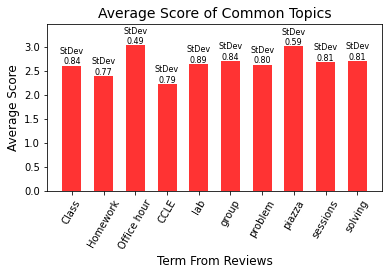

/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Activities_a_raw_histo.png
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Activities_histo.png
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Activities_latex.csv
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Assessment_a_raw_histo.png
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Assessment_histo.png
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Assessment_latex.csv
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Flexibility_a_raw_histo.png
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Flexibility_histo.png
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Flexibility_latex.csv
/Users/bbhoar/Documents/student_reviews/Reviews/Casey/Results/Sections/Scored_Opportunit

In [51]:
#If the data has been scored, a raw file should exist that has the scores
#./Reviews/name/Results/full_raw_len.csv
#instructors = {('Ramachandran', 'Roshini'):'Prof', ('Liu', 'Chong'):'Prof', ('Caram', 'Justin'):'Prof'}
               ##('Hoar', 'Ben'):'TA'}#, ('Caram', 'Justin'):'Prof', ('Courey', 'Al '):'Prof', 

instructors = {('Casey', 'Jennifer') : 'Prof'} #('Reilly', 'Amber') : 'Prof', ('Nasrallah', 'Daniel') : 'Prof'}
for teacher in instructors.items():
    #IF SCORED USE THIS CHUNK
    revs = pd.read_csv('./Reviews/' + teacher[0][0] + '/Results/full_raw_len.csv')
    #START This chunk can be used if scoreing needs to be conducted
    #Data = Reviews(teacher[0][0])
    #revs = Data.get_reviews()
    #revs = Data.split_statements(revs)
    #revs, errs = Data.score_all(revs, dummy_run=False)
    #for err in errs:
     #   score = Data.score_phrase(err[0])
     #   err.insert(1, score)
     #   revs.loc[len(revs)] = err
    #revs.to_csv('./Reviews/' + teacher[0][0] + '/Results/full_raw_len.csv')
    #END

    report = Report(revs, teacher[0][0])
    report.make_report()
    file_name = 'Reviews/' + teacher[0][0]
    lsts = [['Book'],
            ['Exam', 'midterm', 'final'], 
            ['Homework', 'hw ', 'worksheet', 'practice problem', 'assignment'],
            ['Office hour', ' OH ']]
    prof_clss = [['Class', 'course', 'lecture']]
    TA_clss = [['Discussion', 'class', 'course']]
    if (teacher[1] == 'Prof'):
        lsts = [[teacher[0][0], teacher[0][1], ' He ', 'They', 'She ', 'prof', 'professor', 'instructor', 'lecturer', 'dr ']] + prof_clss + lsts + [['CCLE']]
    else: 
        lsts = [[teacher[0][0], teacher[0][1], 'TA ', 'They',' He ', 'She ', 'instructor', 'lecturer', 'teaching assistant']] + TA_clss + lsts
    stats = {}
    term_lengths = []
    for lst in lsts:
        name_report = Word_Report(revs, teacher[0][0], lst)
        if (len(name_report.revs != 0)):
            term_lengths.append((len(name_report.revs), lst[0]))
            name_report.make_word_report()
            stats[lst[0]] = name_report.word_stats()
            name_report = None
        else: lsts.remove(lst)
    
    top_words_obj = Word_Report(revs, teacher[0][0], [""])
    words = top_words_obj.top_words(teacher[0], 150)
    word_cloud(words, teacher[0][0])
    for word in words[:6]:
        hold = []
        hold.append(word)
        if (word == 'chemistry'): hold.append('chem')
        name_report = Word_Report(revs, teacher[0][0], hold)
        term_lengths.append((len(name_report.revs), word))
        name_report.make_word_report()
        stats[word] = name_report.word_stats()
        name_report = None
    stats.pop(teacher[0][0])
    word_graph(stats, file_name)
    name_report = Word_Report(revs, teacher[0][0], [""])
    name_report.latex_table(revs, path='./Reviews/' + teacher[0][0] + '/Results/')
    #score_distribution_graphs(report.hist_data, teacher[0][0])
    __covid_report(teacher[0], words[:6], lsts, sorted(term_lengths, reverse=True))

In [38]:
revs.tail()

,Reviews,Score,Length,Student
1554,the abundance of practice problems was also he...,3,137,253
1555,asynchronous lectures made it much more accomm...,3,70,253
1556,i often felt that lab sections/homework just s...,1,89,254
1557,though problem solving sessions and piazza wer...,4,153,254
1558,"also, watching lab videos did not help me lear...",1,120,254


In [ ]:
   prompts = [["Additional Comments", "Do you have any additional comments?"],
               ["Science Appreciation", "This course increased my appreciation of \
                the relevance of chemistry to the life sciences.This course increased \
                my appreciation of the relevance of chemistry to the life sciences."],
               ["Ability Development", "This course challenged me to develop new abilities \
                and perspectives or broaden existing ones."],
               ["Student Engagement", "In this course, my active \
                engagement in the learning process was encouraged.", "The instructor \
                fostered a welcoming environment for every student to learn and participate."],
               ["Course Activity and Work Efficacy", "The required work enabled me to demonstrate my learning.",
                "The course activities were structured and presented in a way that helped me to learn.",
                "This instructor conveyed clear learning goals for this course."]]

In [ ]:
for prompt in prompts:
    print(prompt)

In [ ]:
Data = Reviews('Hoar')
revs = Data.get_reviews()
revs = Data.split_statements(revs)
revs

In [ ]:
d = {1:1,2:2,4:4}
for val in range(5):
    if (val not in d):
        d[val] = 0

In [ ]:
plt.scatter(d.keys(), d.values())